In [1]:
import os
os.chdir('..')

In [2]:
from wisdom_tree import split_data, ID3, plot_confusion_matrix, calculate_metrics
from nb_utils import display_side_by_side, print_metrics_report
import pandas as pd

In [ ]:
data = pd.read_csv('data/restaurante-extended.csv', sep=';')
data.sample(8)

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
24,Nao,Sim,Nao,Nao,Nenhum,R,Nao,Nao,Frances,0-10,Nao
13,Sim,Nao,Sim,Nao,Nenhum,RRR,Nao,Nao,Frances,10-30,Nao
64,Nao,Nao,Sim,Nao,Nenhum,R,Sim,Sim,Hamburger,0-10,Nao
30,Nao,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Frances,10-30,Nao
17,Sim,Nao,Nao,Nao,Alguns,R,Nao,Nao,Tailandes,0-10,Nao
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
42,Nao,Sim,Sim,Sim,Alguns,R,Nao,Sim,Frances,10-30,Sim
48,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,10-30,Sim


In [ ]:
X_train, X_test, y_train, y_test = split_data(data, random_state=1)
display_side_by_side(X_train, y_train, row_ammount=8, names=['X', 'y'])
display_side_by_side(X_test, y_test, row_ammount=8, names=['X', 'y'])

In [5]:
arvere = ID3().fit(X_train, y_train)
arvere.plot()

Split(Cliente), samples=57, samples_values=(31, 26)
├── Alguns: Split(Res), samples=19, samples_values=(3, 16)
│   ├── Nao: Split(Tipo), samples=9, samples_values=(3, 6)
│   │   ├── Frances: Predict(Nao), samples=1, samples_values=(1, 0)
│   │   ├── Hamburger: Predict(Sim), samples=2, samples_values=(0, 2)
│   │   └── Tailandes: Split(Alternativo), samples=6, samples_values=(2, 4)
│   │       ├── Nao: Split(Chuva), samples=5, samples_values=(1, 4)
│   │       │   ├── Nao: Predict(Sim), samples=4, samples_values=(0, 4)
│   │       │   └── Sim: Predict(Nao), samples=1, samples_values=(1, 0)
│   │       └── Sim: Predict(Nao), samples=1, samples_values=(1, 0)
│   └── Sim: Predict(Sim), samples=10, samples_values=(0, 10)
├── Cheio: Split(Tempo), samples=24, samples_values=(14, 10)
│   ├── 0-10: Predict(Sim), samples=1, samples_values=(0, 1)
│   ├── 10-30: Split(Bar), samples=5, samples_values=(3, 2)
│   │   ├── Nao: Predict(Sim), samples=2, samples_values=(0, 2)
│   │   └── Sim: Predict(Nao

In [6]:
predictions = arvere.predict(X_test)
predictions

['Nao',
 'Nao',
 'Sim',
 'Nao',
 'Nao',
 'Nao',
 'Nao',
 'Nao',
 'Sim',
 'Sim',
 'Sim',
 'Nao',
 'Nao',
 'Nao']

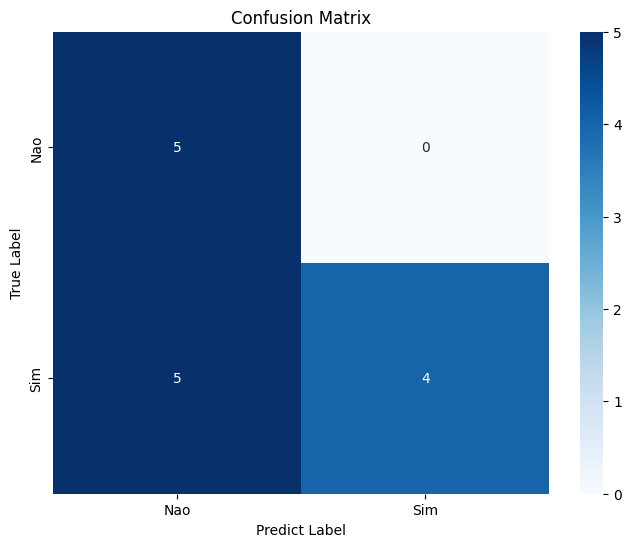

         Classification Report
Overall Accuracy: 0.6429

Class           Precision    Recall       F1-Score    
---------------------------------------------
Nao             0.5000       1.0000       0.6667      
Sim             1.0000       0.4444       0.6154      
---------------------------------------------
Macro Average   0.7500       0.7222       0.6410      


In [7]:
plot_confusion_matrix(y_test, predictions)
metrics = calculate_metrics(y_test, predictions)
print_metrics_report(metrics)